In [177]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

In [50]:
data=pd.read_pickle('socar_origin_ko.p')

In [82]:
def get_group_count(x):
    non_fraud, fraud = data[data['fraud_YN']==0], data[data['fraud_YN']==1]
    a=non_fraud.groupby(x)[x].count()
    b=fraud.groupby(x)[x].count()
    return a,b

In [83]:
def chat(x):
    labels = get_group_count(x)[0].index
    sizes = get_group_count(x)[0].values

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    labels = get_group_count(x)[1].index
    sizes = get_group_count(x)[1].values

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

In [55]:
plt.rc('font', family='AppleGothic')

In [85]:
col_list=['age_group', 'cumulative_use_count','pf_type', 'start_hour','duration', 'accident_hour', 'repair_cost', 'insure_cost','accident_location', 'car_part1','acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN','test_set']
no_use=['b2b','sharing_type','has_previous_accident','car_model','accident_ratio','socarpass','socarsave','repair_cnt','insurance_site_aid_YN','total_prsn_cnt','car_part2']

In [86]:
#usable columns
use=[x for x in data.columns if x not in no_use]
data=data[use]

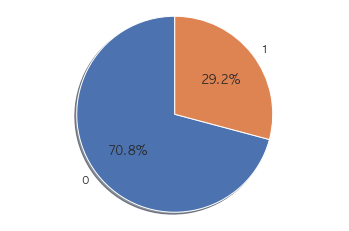

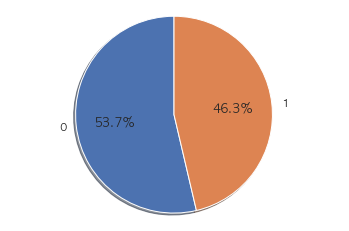

In [110]:
chat('police_site_aid_YN')

In [171]:
#split num_cols and cat_cols 
num_col_list=['repair_cost','insure_cost']
data_num=data[num_col_list]
data_cat=data[[x for x in data.columns if x not in num_col_list]]

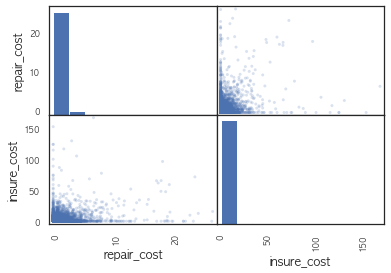

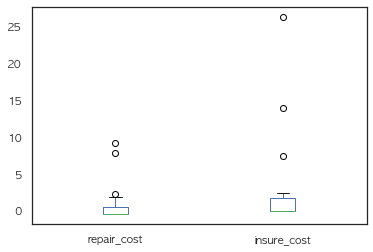

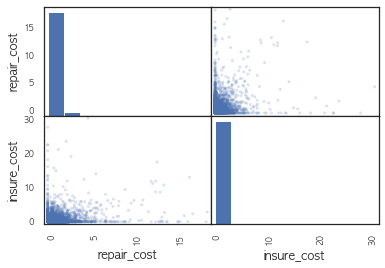

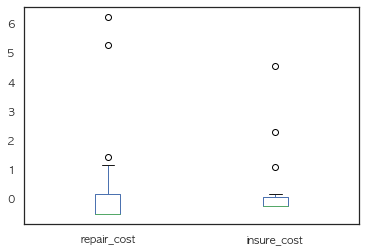

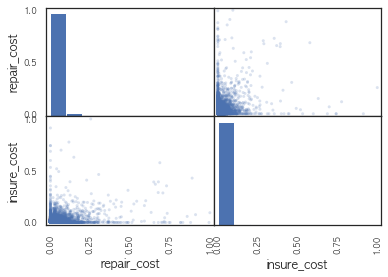

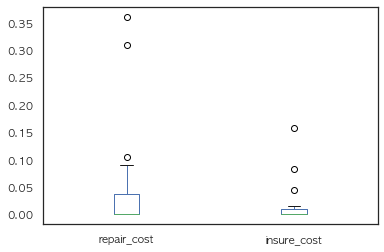

In [180]:
def scaling(x):
    data_num_tmp=data_num.copy()
    transformer = x()
    x_data =transformer.fit_transform(data_num_tmp)
    data_num_tmp[data_num_tmp.columns]=x_data
    pd.plotting.scatter_matrix(data_num_tmp, alpha=0.2)
    data_num_tmp['fraud']=data['fraud_YN']
    insure_cost_dist=data_num_tmp[data_num_tmp['fraud']==1][['repair_cost','insure_cost']]
    insure_cost_dist.plot.box()
for i in [RobustScaler, StandardScaler, MinMaxScaler]:
    scaling(i)

<AxesSubplot:>

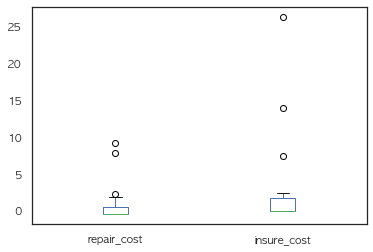

In [11]:
col_list=['fraud_YN','age_group', 'cumulative_use_count','pf_type', 'start_hour','duration', 'accident_hour', 'repair_cost', 'insure_cost','accident_location', 'car_part1','acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN','test_set']

In [57]:
data_cat=data[col_list]

array([[<AxesSubplot:xlabel='fraud_YN', ylabel='fraud_YN'>,
        <AxesSubplot:xlabel='repair_cost', ylabel='fraud_YN'>,
        <AxesSubplot:xlabel='insure_cost', ylabel='fraud_YN'>],
       [<AxesSubplot:xlabel='fraud_YN', ylabel='repair_cost'>,
        <AxesSubplot:xlabel='repair_cost', ylabel='repair_cost'>,
        <AxesSubplot:xlabel='insure_cost', ylabel='repair_cost'>],
       [<AxesSubplot:xlabel='fraud_YN', ylabel='insure_cost'>,
        <AxesSubplot:xlabel='repair_cost', ylabel='insure_cost'>,
        <AxesSubplot:xlabel='insure_cost', ylabel='insure_cost'>]],
      dtype=object)

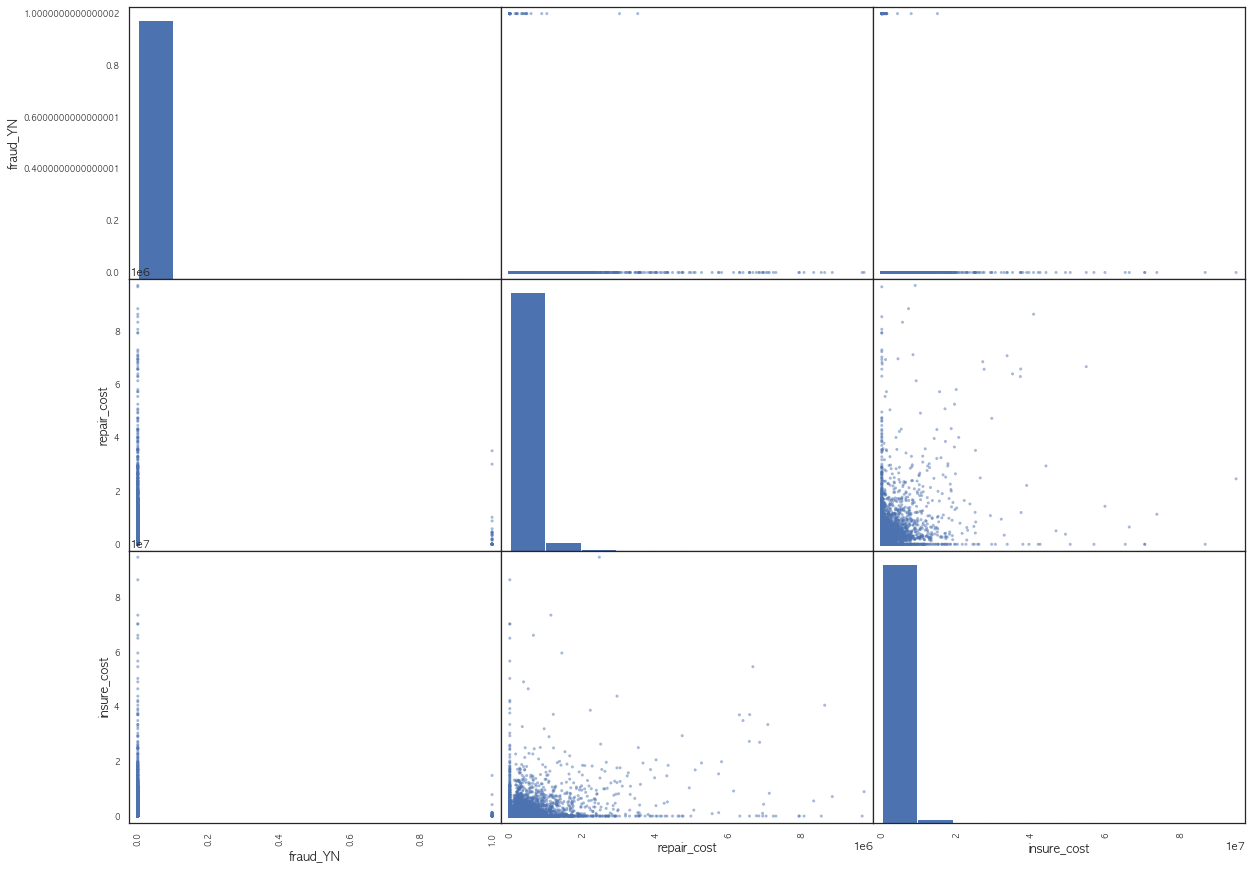

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='repair_cost', ylabel='fraud_YN'>

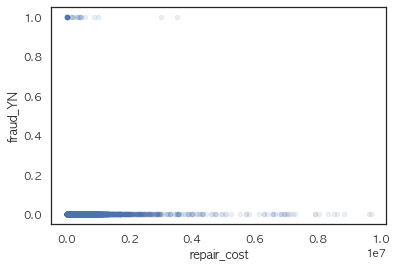

In [31]:
from pandas.plotting import scatter_matrix
data.plot(kind='scatter',x='repair_cost',y="fraud_YN", alpha=0.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='insure_cost', ylabel='fraud_YN'>

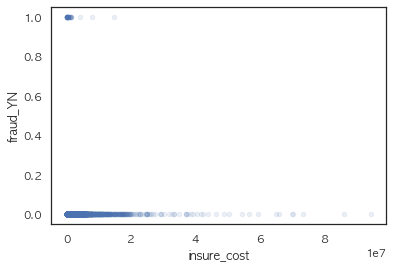

In [32]:
from pandas.plotting import scatter_matrix
data.plot(kind='scatter',x='insure_cost',y="fraud_YN", alpha=0.1)

In [38]:
cat_df=data[['accident_location','car_part1','acc_type1','insurance_site_aid_YN','police_site_aid_YN','age_group','cumulative_use_count','pf_type','start_hour','duration','accident_hour']]

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(cat_df)
cat_encoded

array([[4., 0., 0., ..., 1., 4., 1.],
       [4., 1., 2., ..., 5., 3., 1.],
       [0., 1., 2., ..., 5., 3., 3.],
       ...,
       [5., 0., 0., ..., 5., 1., 2.],
       [1., 1., 0., ..., 3., 2., 4.],
       [3., 0., 0., ..., 3., 0., 3.]])

In [45]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_data = cat_encoder.fit_transform(cat_encoded)
cat_data.toarray(),ordinal_encoder.categories_

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 [array(['고속도로', '쏘카존', '알수없음_장소', '이면도로', '일반도로', '주차장'], dtype=object),
  array([0, 1]),
  array(['알수없음', '차대인', '차대차', '차량단독'], dtype=object),
  array(['미출동', '알수없음', '출동'], dtype=object),
  array([0, 1]),
  array([21, 23, 27, 31, 41]),
  array([1, 2, 3, 4]),
  array(['PF30', 'PF5', 'PF70'], dtype=object),
  array(['05~07', '08~10', '11~13', '14~16', '17~20', '21~04'], dtype=object),
  array(['0~1', '10~36', '2~5', '36_초과', '6~9'], dtype=object),
  array(['05~07', '08~10', '11~13', '14~16', '17~20', '21~04', '알수없음'],
        dtype=object)])

In [19]:
# y_test, y_train=data[["fraud_YN"]][data['test_set']==1],data[["fraud_YN"]][data['test_set']==0]
# x_test, x_train=data[data['test_set']==1].drop(''),data[(data['fraud_YN']==1)&(data['test_set']==0)]